## Import Dependencies

In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy

#import API Key
from config import weather_api_key

#Output file CSV

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#create lists to hold lat_lng  and cities
lat_lngs = []
cities = []
countries = []

#create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    #if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)
        countries.append(country)
#print the city and country count to confirm sufficient count
print(len(cities))
print(len(countries))

623
623


In [3]:
#create a dataframe to store data
city_weather = pd.DataFrame({
    'City': cities,
    'Cloudiness': "",
    'Country': countries,
    'Date': "",
    'Humidity': "",
    'Latitude': "",
    'Longitude': "",
    'Max Temp': "",
    'Windspeed': ""})
#view first 5 
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Windspeed
0,vaini,,to,,,,,,
1,lasem,,id,,,,,,
2,tateyama,,jp,,,,,,
3,new norfolk,,au,,,,,,
4,cabo san lucas,,mx,,,,,,


## API Calls


In [4]:
#create counters
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create an empty list to hold the weather data
city_data = []
#print the beginning of logging
print('''------------------------
Beginning Data Retrieval
------------------------''')
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

------------------------
Beginning Data Retrieval
------------------------


In [5]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                  "Lat": city_lat,
                  "Lng": city_lng,
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print('''-----------------------------
      Data Retrieval Complete      
      -----------------------------''')

Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | lasem
Processing Record 3 of Set 13 | tateyama
Processing Record 4 of Set 13 | new norfolk
Processing Record 5 of Set 13 | cabo san lucas
Processing Record 6 of Set 13 | samusu
City not found. Skipping...
Processing Record 7 of Set 13 | kloulklubed
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | akyab
Processing Record 10 of Set 13 | lavrentiya
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | cape town
Processing Record 13 of Set 13 | setermoen
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | forssa
Processing Record 16 of Set 13 | wagar
Processing Record 17 of Set 13 | dargaville
Processing Record 18 of Set 13 | tasiilaq
Processing Record 19 of Set 13 | severo-kurilsk
Processing Record 20 of Set 13 | sao filipe
Processing Record 21 of Set 13 | kapaa
Processing Record 22 of Set 13 | worthington
Processing Record 23 of Set 13 | hilo
Processing Re

Processing Record 34 of Set 16 | general pico
Processing Record 35 of Set 16 | dauphin
Processing Record 36 of Set 16 | port hardy
Processing Record 37 of Set 16 | flin flon
Processing Record 38 of Set 16 | blackfoot
Processing Record 39 of Set 16 | eenhana
Processing Record 40 of Set 16 | moose factory
Processing Record 41 of Set 16 | zamora
Processing Record 42 of Set 16 | camana
Processing Record 43 of Set 16 | alyangula
Processing Record 44 of Set 16 | doha
Processing Record 45 of Set 16 | cidreira
Processing Record 46 of Set 16 | victor harbor
Processing Record 47 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 16 | qasigiannguit
Processing Record 49 of Set 16 | kajaani
Processing Record 50 of Set 16 | mecca
Processing Record 1 of Set 17 | dubenskiy
City not found. Skipping...
Processing Record 2 of Set 17 | farsund
Processing Record 3 of Set 17 | krasnovishersk
Processing Record 4 of Set 17 | touros
Processing Record 5 of Set 17 | qaanaaq
Processing 

Processing Record 19 of Set 20 | sechura
Processing Record 20 of Set 20 | ancud
Processing Record 21 of Set 20 | mahibadhoo
Processing Record 22 of Set 20 | skjervoy
Processing Record 23 of Set 20 | barbar
City not found. Skipping...
Processing Record 24 of Set 20 | kayerkan
Processing Record 25 of Set 20 | khonuu
City not found. Skipping...
Processing Record 26 of Set 20 | charters towers
Processing Record 27 of Set 20 | katobu
Processing Record 28 of Set 20 | manzanillo
Processing Record 29 of Set 20 | port keats
Processing Record 30 of Set 20 | balkhash
Processing Record 31 of Set 20 | tornio
Processing Record 32 of Set 20 | roald
Processing Record 33 of Set 20 | baikunthpur
Processing Record 34 of Set 20 | ambulu
Processing Record 35 of Set 20 | grafton
Processing Record 36 of Set 20 | pacifica
Processing Record 37 of Set 20 | pangai
Processing Record 38 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 20 | alamosa
Processing Record 40 of Set 20 | gra

Processing Record 3 of Set 24 | alice springs
Processing Record 4 of Set 24 | tarana
Processing Record 5 of Set 24 | jalu
Processing Record 6 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 7 of Set 24 | baoning
Processing Record 8 of Set 24 | nkhata bay
Processing Record 9 of Set 24 | verkhoyansk
Processing Record 10 of Set 24 | biabou
Processing Record 11 of Set 24 | upington
Processing Record 12 of Set 24 | nioro
Processing Record 13 of Set 24 | dukat
Processing Record 14 of Set 24 | cockburn town
Processing Record 15 of Set 24 | ciudad guayana
Processing Record 16 of Set 24 | knysna
Processing Record 17 of Set 24 | tigil
Processing Record 18 of Set 24 | songjianghe
Processing Record 19 of Set 24 | shellbrook
Processing Record 20 of Set 24 | esil
Processing Record 21 of Set 24 | havoysund
Processing Record 22 of Set 24 | nakusp
Processing Record 23 of Set 24 | magadan
Processing Record 24 of Set 24 | sao jose do belmonte
Processing Record 25 of Set 24 | kemijarvi
Processing 

In [7]:
#convert array of dictionaries to pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,68.16,88,40,10.36,TO,2021-06-24 16:55:52
1,Lasem,-6.6922,111.4527,78.21,84,90,3.67,ID,2021-06-24 17:02:14
2,Tateyama,34.9833,139.8667,73.15,84,100,8.12,JP,2021-06-24 16:56:57
3,New Norfolk,-42.7826,147.0587,44.92,86,80,1.32,AU,2021-06-24 16:56:16
4,Cabo San Lucas,22.8909,-109.9124,90.61,69,87,7.92,MX,2021-06-24 16:56:14
5,Kloulklubed,7.0419,134.2556,75.70,69,79,2.98,PW,2021-06-24 17:01:24
6,Albany,42.6001,-73.9662,78.82,41,3,9.26,US,2021-06-24 16:51:50
7,Akyab,20.1500,92.9000,80.15,85,76,5.66,MM,2021-06-24 17:02:15
8,Lavrentiya,65.5833,-171.0000,48.02,68,100,7.23,RU,2021-06-24 16:58:21
9,Rikitea,-23.1203,-134.9692,75.04,79,24,11.30,PF,2021-06-24 16:56:04


In [8]:
#reorder columns in df
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-06-24 16:55:52,-21.2000,-175.2000,68.16,88,40,10.36
1,Lasem,ID,2021-06-24 17:02:14,-6.6922,111.4527,78.21,84,90,3.67
2,Tateyama,JP,2021-06-24 16:56:57,34.9833,139.8667,73.15,84,100,8.12
3,New Norfolk,AU,2021-06-24 16:56:16,-42.7826,147.0587,44.92,86,80,1.32
4,Cabo San Lucas,MX,2021-06-24 16:56:14,22.8909,-109.9124,90.61,69,87,7.92
...,...,...,...,...,...,...,...,...,...
566,Orel,RU,2021-06-24 17:04:44,52.9658,36.0803,80.02,74,68,4.68
567,North Platte,US,2021-06-24 17:04:44,41.1239,-100.7654,82.29,65,1,4.00
568,Torbat-E Jam,IR,2021-06-24 17:04:45,35.2440,60.6225,78.96,15,0,14.97
569,San Ignacio,BZ,2021-06-24 17:04:45,17.1561,-89.0714,89.33,54,100,7.81


In [9]:
#create output file (CSV)
output_data_file = "weather_data_cities.csv"
#export the city_data into a csv
city_data_df.to_csv('output_data_file', index=False, header=True)

## Plotting Data

In [10]:
#extract relevant fields from the df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [11]:
#import time module
import time
#get today's date in seconds
today = time.strftime('%x')
today

'06/24/21'

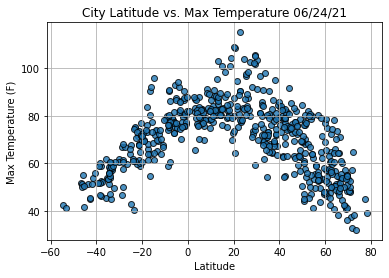

In [13]:
#import time
import time

#build the scatter plot for lat vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths=1, marker='o', alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig1.png")

#show plot
plt.show()

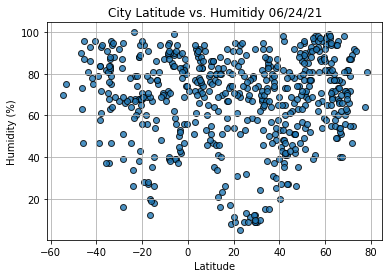

In [15]:
#Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Humitidy " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig2.png")

#show plot
plt.show()

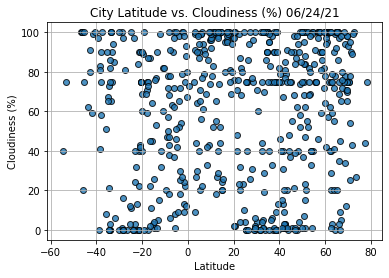

In [16]:
#Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig3.png")

#show plot
plt.show()

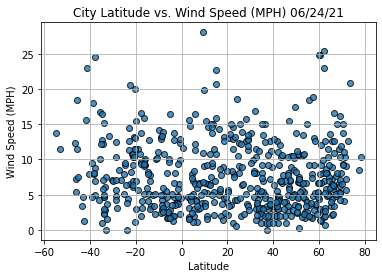

In [17]:
#Build scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (MPH) " + time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig4.png")

#show plot
plt.show()